# Model 4 - KNN Classifier

# Read Datset

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
import pandas as pd
df = pd.read_csv("D:/Credit Card Default iNeuron Internship/Dataset/UCI_Credit_Card.csv")
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
df1 = df.drop(labels=['ID'],axis=1)

In [4]:
df1['SEX']=df['SEX'].astype(str)
df1['EDUCATION']=df['EDUCATION'].astype(str)
df1['MARRIAGE']=df['MARRIAGE'].astype(str)
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   30000 non-null  float64
 1   SEX                         30000 non-null  object 
 2   EDUCATION                   30000 non-null  object 
 3   MARRIAGE                    30000 non-null  object 
 4   AGE                         30000 non-null  int64  
 5   PAY_0                       30000 non-null  int64  
 6   PAY_2                       30000 non-null  int64  
 7   PAY_3                       30000 non-null  int64  
 8   PAY_4                       30000 non-null  int64  
 9   PAY_5                       30000 non-null  int64  
 10  PAY_6                       30000 non-null  int64  
 11  BILL_AMT1                   30000 non-null  float64
 12  BILL_AMT2                   30000 non-null  float64
 13  BILL_AMT3                   300

# Defining X and Y

In [5]:
X = df1.drop(labels=['default.payment.next.month'],axis=1)
Y = df1[['default.payment.next.month']]

In [6]:
from definitions import catcon
cat, con = catcon(X)

Categorical and Continuous variables appended


# Data Preprocessing

In [9]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X1 = pd.DataFrame(ss.fit_transform(X[con]),columns=con)
X2 = pd.get_dummies(X[cat])
Xnew = X1.join(X2)

In [11]:
Xnew.head()

,LIMIT_BAL,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,EDUCATION_1,EDUCATION_2,EDUCATION_3,EDUCATION_4,EDUCATION_5,EDUCATION_6,MARRIAGE_0,MARRIAGE_1,MARRIAGE_2,MARRIAGE_3
0,-1.136720,-1.246020,1.794564,1.782348,-0.696663,-0.666599,-1.530046,-1.486041,-0.642501,-0.647399,...,0,1,0,0,0,0,0,1,0,0
1,-0.365981,-1.029047,-0.874991,1.782348,0.138865,0.188746,0.234917,1.992316,-0.659219,-0.666747,...,0,1,0,0,0,0,0,0,1,0
2,-0.597202,-0.161156,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.298560,-0.493899,...,0,1,0,0,0,0,0,0,1,0
3,-0.905498,0.164303,0.014861,0.111736,0.138865,0.188746,0.234917,0.253137,-0.057491,-0.013293,...,0,1,0,0,0,0,0,1,0,0
4,-0.905498,2.334029,-0.874991,0.111736,-0.696663,0.188746,0.234917,0.253137,-0.578618,-0.611318,...,0,1,0,0,0,0,0,1,0,0


# Saving Standard Scaler Pickle file

In [10]:
import pickle
with open('./StandardScalerPickle/SSknn.pkl', 'wb') as files:
    pickle.dump(ss, files)

# Train Test Split

In [12]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(Xnew,Y,test_size=0.2,random_state=21)

# KNN Base model

In [15]:
from sklearn.neighbors import KNeighborsClassifier
tr = []
ts = []
for i in range(2,41):
    knn = KNeighborsClassifier(n_neighbors=i)
    model = knn.fit(xtrain,ytrain)
    tr_pred = model.predict(xtrain)
    ts_pred = model.predict(xtest)
    from sklearn.metrics import accuracy_score
    tr_acc = accuracy_score(ytrain,tr_pred)
    ts_acc = accuracy_score(ytest,ts_pred)
    tr.append(tr_acc)
    ts.append(ts_acc)

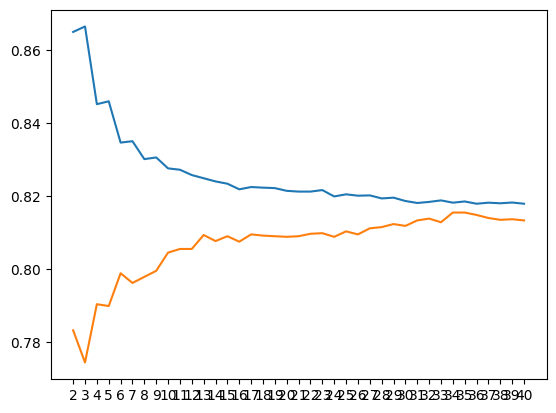

In [16]:
import matplotlib.pyplot as plt
r = range(2,41)
plt.plot(r,tr)
plt.plot(r,ts)
plt.xticks(range(2,41,1))
plt.show()

In [17]:
max(ts)

0.8155

# Model 4.1 Gridsearch CV for KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier()
tg = {"n_neighbors":range(2,41,1)}
cv = GridSearchCV(knn,tg,scoring='accuracy',cv=4)
cvmodel = cv.fit(xtrain,ytrain)
cvmodel.best_params_

{'n_neighbors': 22}

In [19]:
knn = KNeighborsClassifier(n_neighbors=22)
model41 = knn.fit(xtrain,ytrain)

In [20]:
tr_pred = model.predict(xtrain) 
ts_pred = model.predict(xtest)
from sklearn.metrics import accuracy_score, recall_score
tr_acc41 = accuracy_score(ytrain,tr_pred)
ts_acc41 = accuracy_score(ytest,ts_pred)
tr_rec41 = recall_score(ytrain,tr_pred)
ts_rec41 = recall_score(ytest,ts_pred)
print('Training Accuracy : ',round(tr_acc41,4))
print('Testing Accuracy  : ',round(ts_acc41,4))
print('Training Recall   : ',round(tr_rec41,4))
print('Testing Recall    : ',round(ts_rec41,4))

Training Accuracy :  0.8179
Testing Accuracy  :  0.8133
Training Recall   :  0.3287
Testing Recall    :  0.3187


In [21]:
from sklearn.metrics import classification_report
clsrep = classification_report(ytest,ts_pred)
print(clsrep)

              precision    recall  f1-score   support

           0       0.83      0.96      0.89      4654
           1       0.68      0.32      0.43      1346

    accuracy                           0.81      6000
   macro avg       0.75      0.64      0.66      6000
weighted avg       0.80      0.81      0.79      6000



# Save KNN Model Pickle File

In [22]:
import pickle
with open('./Models/knnmodel.pkl', 'wb') as files:
    pickle.dump(model41, files)